<a href="https://colab.research.google.com/github/Jasxpreet/Data-Science-Assignments/blob/main/Getting_Data_and_Working_with_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
Write a Python script that performs the following tasks:

•	Reads a multi-line dataset from std.in, where each line represents a comma-separated record (e.g., Name, Age, Country).

•	Processes the data to:

    o	Filter out rows where the Age is below 18.

    o	Sort the remaining rows by Country and then by Name in ascending order.

•	Outputs the processed data to std.out in the same comma-separated format.


*Example Input:*

Alice,25,USA  
Bob,17,Canada  
Charlie,30,UK  
Diana,20,USA  
Eve,16,India  

*Expected Output:*

Charlie,30,UK  
Alice,25,USA  
Diana,20,USA


In [ ]:
# Write the script to a file
%%writefile data_processing.py

import sys

def data_processing(input_data):
    data = [line.split(',') for line in input_data.strip().split('\n')]  # Parse the input_data into a list of data
    age_filter = [record for record in data if int(record[1]) >= 18]  # Filter out rows where Age is below 18
    sorted_data = sorted(age_filter, key=lambda x: (x[2], x[0]))  # Sort by Country and then by Name

    # Write the output to stdout
    for record in sorted_data:
        sys.stdout.write(','.join(record) + '\n')

if __name__ == "__main__":
    input_data = sys.stdin.read()  # Read input from stdin
    data_processing(input_data)

Writing data_processing.py


In [ ]:
# Provide the input data to the script using stdin
input_data = """Alice,25,USA
Bob,17,Canada
Charlie,30,UK
Diana,20,USA
Eve,16,India"""

# Save input to a temporary file
with open("input_data.txt", "w") as f:
    f.write(input_data)

In [ ]:
# Run the script using the input file as stdin
!python data_processing.py < input_data.txt

Charlie,30,UK
Alice,25,USA
Diana,20,USA


# Question 2

Write a Python script to scrape the titles of the top trending repositories from the [GitHub Trending page](https://github.com/trending). The script should:

•	Use the requests library to fetch the webpage content.

•	Parse the HTML using BeautifulSoup to extract:

    o	The repository name.

    o	The description (if available).

    o	The number of stars.

•	Save the extracted data as a CSV file with the following columns: Repository Name, Description, Stars.


In [ ]:
%%writefile github_trending.py

import requests
import pandas as pd
from bs4 import BeautifulSoup

def github_trending():
# Fetching the GitHub Trending page
  url="https://github.com/trending"
  response=requests.get(url)


  if(response.status_code==200):
    print("Successful Response")
    content=response.text # Save the HTML content for further steps
  else:
    print(f"Filed to fetch the page,status code: {response.status_code}")
    return

  soup=BeautifulSoup(content,'html.parser') #Parse the HTML content

  # Find all repository containers
  repos = soup.find_all('article', class_='Box-row')
  print(f"Found {len(repos)} repositories.")

  repo_data=[]

  for repo in repos:
    # Extract the repository name
    repo_name=repo.find('h2',class_="h3").text.strip().replace('\n', '').replace(' ', '')

    # Extract the description (if available)
    description_tag=repo.find('p')
    description=description_tag.text.strip() if description_tag else "No Description"

    # Extract the number of stars
    stars_tag=repo.find('span',class_='d-inline-block float-sm-right')
    stars = int(stars_tag.text.split()[0].replace(',', '')) if stars_tag else 0

    # Add data to the list
    repo_data.append({
        'Repository Name':repo_name,
        'Description':description,
        'Stars':stars
    })

  # Save the data to a CSV file
  df=pd.DataFrame(repo_data)
  df.to_csv('Github Trending Data.csv',index=False)
  return "Data Saved Successfuly"

if __name__=="__main__":
  print(github_trending())

Writing github_trending.py


In [ ]:
!python github_trending.py

Successful Response
Found 15 repositories.
Data Saved Successfuly


#Question 3
Use the OpenWeatherMap API to create a weather data fetcher. The script should:

•	Accept a list of city names from the user as input (e.g., "London, Paris, New York").

•	Query the OpenWeatherMap API to fetch the current temperature, humidity, and weather description for each city.

•	Display the results in a tabular format in the terminal using tabulate.


In [ ]:
%%writefile weather.py

import requests
from tabulate import tabulate

# Function to fetch weather data for a city
def get_weather_data(city_name, api_key):
    url = f"http://api.openweathermap.org/data/2.5/weather"
    params = {
        'q': city_name,
        'appid': api_key,
        'units': 'metric'  # Use metric units for temperature in Celsius
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        return {
            "City": city_name,
            "Temperature (°C)": data['main']['temp'],
            "Humidity (%)": data['main']['humidity'],
            "Weather": data['weather'][0]['description'].capitalize()
        }
    else:
        return {
            "City": city_name,
            "Temperature (°C)": "N/A",
            "Humidity (%)": "N/A",
            "Weather": "City not found"
        }

if __name__=="__main__":

  api_key="63bb566acd55264b569a8abd9bd0a9bc" #OpenWeatherMap API key

  city_names=input("Enter city names(comma seperated): ").split(",")
  city_names=[city.strip() for city in city_names]

  # Fetch weather data for each city
  weather_data=[get_weather_data(city,api_key) for city in city_names]

  # Display the results in a tabular format
  print(tabulate(weather_data, headers="keys", tablefmt="grid"))

Writing weather.py


In [ ]:
!python weather.py

Enter city names(comma seperated): New York
+----------+--------------------+----------------+-----------+
| City     |   Temperature (°C) |   Humidity (%) | Weather   |
+==========+====================+================+===========+
| New York |               -5.2 |             61 | Clear sky |
+----------+--------------------+----------------+-----------+




---


# Question 4

Use the "[Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)" dataset from Kaggle, available at: Students Performance Dataset on Kaggle

Tasks:
1. Exploration

    •	Load the dataset and display its first 5 rows.

    •	Calculate summary statistics (mean, median, standard deviation) for the numerical columns (math score, reading score, writing score).

    •	Create a correlation matrix to identify relationships between the three scores.

2. Data Cleaning and Munging

  •	Handle missing or invalid values:

        o	If any score is missing, replace it with the mean score for that subject.
        o	Drop rows where any categorical column (gender, lunch, etc.) is missing.
  •	Ensure all column names are lowercase and replace spaces with underscores.

3. Data Manipulation
  
  •	Add a new column average_score that calculates the average of math score, reading score, and writing score.

  •	Create a new categorical column performance_category:

        o	Assign High if average_score is 85 or above.

        o	Assign Medium if average_score is between 70 and 84.
        
        o	Assign Low if average_score is below 70.

4. Rescaling
  
  •	Normalize the three scores (math score, reading score, writing score) to the range [0, 1] using Min-Max scaling.
5. Dimensionality Reduction

  •	Apply Principal Component Analysis (PCA) on the numerical columns (math score, reading score, writing score) and retain components that explain at least 90% of the variance.
6. Visualization

  •	Create a histogram to observe the distribution of average_score.

  •	Plot math score against reading score to observe trends.

  •	Visualize the PCA-reduced data in a 2D scatterplot, color-coded by performance_category.


In [ ]:
! kaggle datasets download spscientist/students-performance-in-exams

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
students-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip students-performance-in-exams.zip

Archive:  students-performance-in-exams.zip
replace StudentsPerformance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: StudentsPerformance.csv  


In [ ]:
import pandas as pd
df=pd.read_csv('StudentsPerformance.csv')

df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


   math score  reading score  writing score
0          72             72             74
1          69             90             88
2          90             95             93
3          47             57             44
4          76             78             75
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


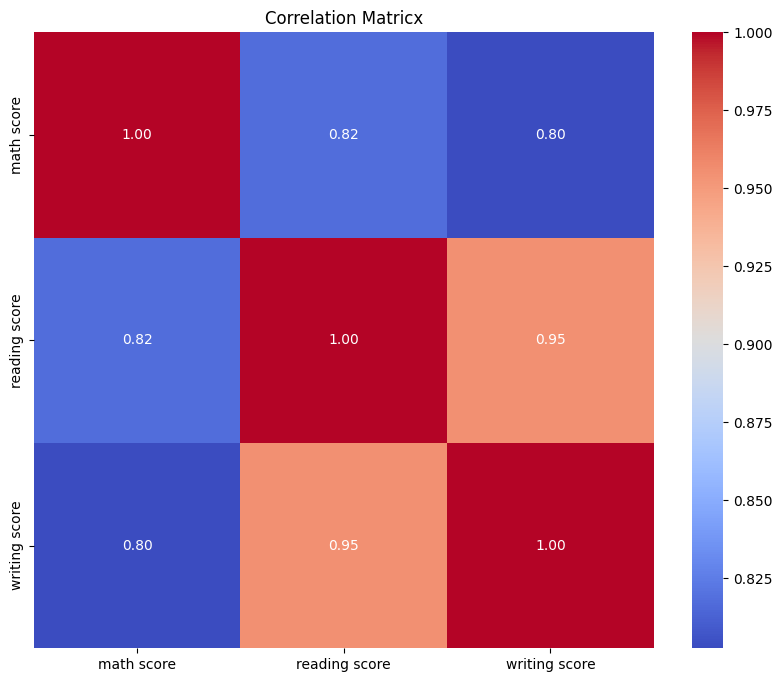

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df=df.select_dtypes(include=['float64','int64'])
print(numeric_df.head(5))
correlation_matrix=numeric_df.corr()
print(correlation_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matricx")
plt.show()

In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
#AS OUR DATASET HAS NO MISSING VALUES , SO THERE IS NO NEED TO DO THESE STEPS:

df['math score'].fillna(df['math score'].mean(), inplace=True)
df['reading score'].fillna(df['reading score'].mean(), inplace=True)
df['writing score'].fillna(df['writing score'].mean(), inplace=True)

df.dropna(subset=['gender', 'lunch', 'test preparation course'], inplace=True)

<ipython-input-69-7446f10db211>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['math score'].fillna(df['math score'].mean(), inplace=True)
<ipython-input-69-7446f10db211>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# Rename columns to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df.head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Calculate the average score
df['average_score'] = round(df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)).astype(int)


In [ ]:
df.head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,93
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


In [ ]:
#Performance category
choices = ['Low','Medium','High']
df['performance_category'] = pd.cut(df['average_score'], bins=[-float('inf'), 69, 84, float('inf')], labels=choices)

In [ ]:
df.head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,performance_category
0,female,group B,bachelor's degree,standard,none,72,72,74,73,Medium
1,female,group C,some college,standard,completed,69,90,88,82,Medium
2,female,group B,master's degree,standard,none,90,95,93,93,High
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,Low
4,male,group C,some college,standard,none,76,78,75,76,Medium


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the scores
df[['math_score', 'reading_score', 'writing_score']] = scaler.fit_transform(df[['math_score', 'reading_score', 'writing_score']])

In [ ]:
df.head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,performance_category
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111,73,Medium
1,female,group C,some college,standard,completed,0.69,0.879518,0.866667,82,Medium
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222,93,High
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778,49,Low
4,male,group C,some college,standard,none,0.76,0.734940,0.722222,76,Medium


In [ ]:
from sklearn.decomposition import PCA

X = df[['math_score', 'reading_score', 'writing_score']]

# Apply PCA
pca = PCA(n_components=0.90)  # Retain components that explain 90% of the variance
X_pca = pca.fit_transform(X)

# Add the PCA components to the dataframe
df_pca = pd.DataFrame(X_pca, columns=[f'pc{i+1}' for i in range(X_pca.shape[1])])
df = pd.concat([df, df_pca], axis=1)

In [ ]:
print(df_pca.columns)


Index(['pc1'], dtype='object')


In [ ]:
df.head(6)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,performance_category,pc1
0,female,group B,bachelor's degree,standard,none,0.72,0.662651,0.711111,73,Medium,0.090373
1,female,group C,some college,standard,completed,0.69,0.879518,0.866667,82,Medium,0.304755
2,female,group B,master's degree,standard,none,0.90,0.939759,0.922222,93,High,0.480262
3,male,group A,associate's degree,free/reduced,none,0.47,0.481928,0.377778,49,Low,-0.347032
4,male,group C,some college,standard,none,0.76,0.734940,0.722222,76,Medium,0.162292
5,female,group B,associate's degree,standard,none,0.71,0.795181,0.755556,77,Medium,0.195209


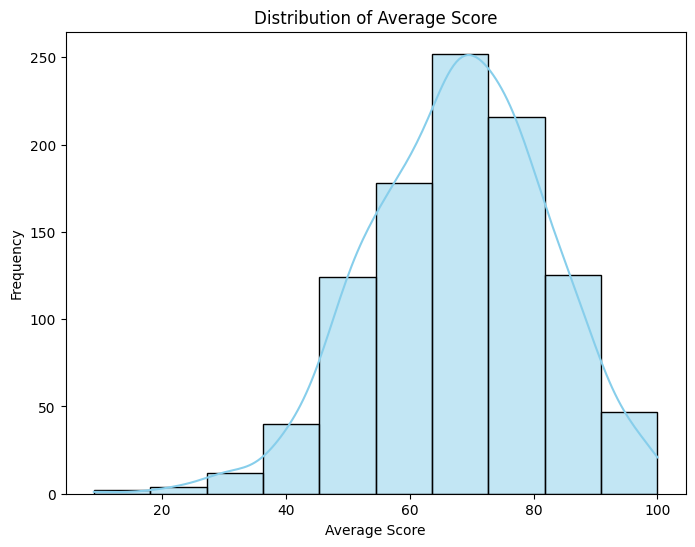

In [ ]:
# Plot histogram for average_score
plt.figure(figsize=(8,6))
sns.histplot(df['average_score'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Average Score')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()


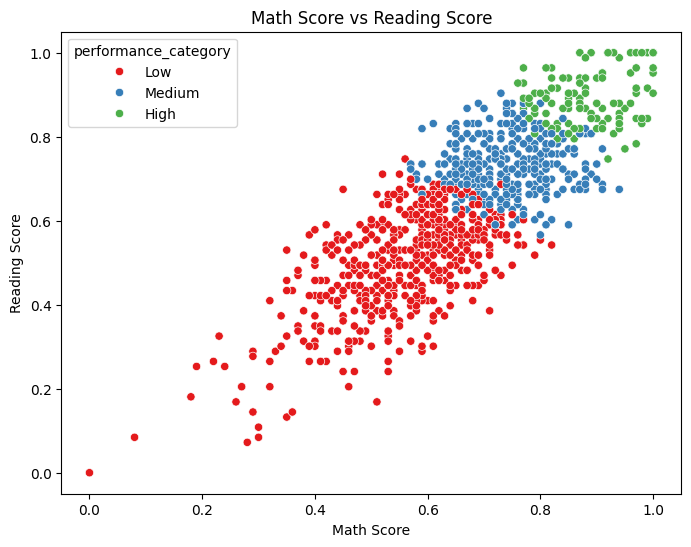

In [ ]:
# Plot math score against reading score
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['math_score'], y=df['reading_score'], hue=df['performance_category'], palette='Set1')
plt.title('Math Score vs Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()


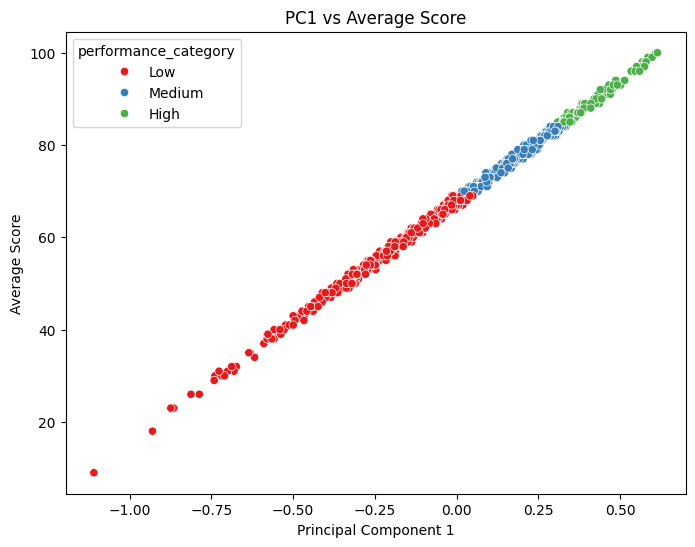

In [ ]:
# Plot a single component
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['pc1'], y=df['average_score'], hue=df['performance_category'], palette='Set1')
plt.title('PC1 vs Average Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Average Score')
plt.show()

**Writing py file for this code**

In [ ]:
# Write the Python script to a file named 'weather.py'
%%writefile pca.py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

def dimension_reduction(csv_file):
    #Load the dataset
    df = pd.read_csv(csv_file)

    # Calculation for correlation matrix
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

    # Handle missing values
    df['math score'] = df['math score'].fillna(df['math score'].mean())
    df['reading score'] = df['reading score'].fillna(df['reading score'].mean())
    df['writing score'] = df['writing score'].fillna(df['writing score'].mean())

    df.dropna(subset=['gender', 'lunch', 'test preparation course'], inplace=True)

    # Rename columns to lowercase and replace spaces with underscores
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # average score
    df['average_score'] = round(df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)).astype(int)

    # Categorize performance
    choices = ['Low', 'Medium', 'High']
    df['performance_category'] = pd.cut(df['average_score'], bins=[-float('inf'), 69, 84, float('inf')], labels=choices)

    # Normalize the scores
    scaler = MinMaxScaler()
    df[['math_score', 'reading_score', 'writing_score']] = scaler.fit_transform(df[['math_score', 'reading_score', 'writing_score']])

    # Apply PCA
    X = df[['math_score', 'reading_score', 'writing_score']]
    pca = PCA(n_components=0.90)  # Retain components that explain 90% of the variance
    X_pca = pca.fit_transform(X)

    # Add the PCA components to the dataframe
    df_pca = pd.DataFrame(X_pca, columns=[f'pc{i+1}' for i in range(X_pca.shape[1])])
    df = pd.concat([df, df_pca], axis=1)

    # Plot histogram for average_score
    plt.figure(figsize=(8, 6))
    sns.histplot(df['average_score'], bins=10, kde=True, color='skyblue')
    plt.title('Distribution of Average Score')
    plt.xlabel('Average Score')
    plt.ylabel('Frequency')
    plt.show()

    # Plot math score vs reading score
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['math_score'], y=df['reading_score'], hue=df['performance_category'], palette='Set1')
    plt.title('Math Score vs Reading Score')
    plt.xlabel('Math Score')
    plt.ylabel('Reading Score')
    plt.show()

    # Plot PC1 vs Average Score
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_pca['pc1'], y=df['average_score'], hue=df['performance_category'], palette='Set1')
    plt.title('PC1 vs Average Score')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Average Score')
    plt.show()

# Run the function with the passed CSV file
if __name__ == '__main__':
    dimension_reduction('StudentsPerformance.csv')

Overwriting pca.py


In [ ]:
!python pca.py

Figure(1000x800)
Figure(800x600)
Figure(800x600)
Figure(800x600)
